In [27]:
#python3 jupyter notebook
#code for SL/SP PCA
#template code from: https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

In [28]:
#import all required libraries
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.lines as mlines
%matplotlib inline

In [29]:
#import the data with pandas
gc_raw = pd.read_csv("gc_PCA_format.csv", sep=',', header=0, index_col=0)
gc_raw.head(n=4)

,sample 1,sample 2,sample 3,sample 4,sample 5,species
constituent,,,,,,
Dodecanoic acid,63647125,53363822.0,42269035.0,27253154,22631312,SP
Methyl tetradecanoate,243835,145878.0,84805.0,2349590,120377,SP
Myristic acid,45831503,36252024.0,25631582.0,39928775,38769138,SP
D-Mannose,13138,14942.0,0.0,0,15688,SP


In [30]:
#from sklearn.preprocessing import StandardScaler

samples = ["sample 1", "sample 2", "sample 3", "sample 4", "sample 5"]

data =  gc_raw.loc[:,samples].values

gc_scaled = StandardScaler().fit_transform(data)

gc_scaled[:2]

array([[ 3.32877318,  3.13383488,  4.06376761,  2.90353277,  2.29807529],
       [-0.40266559, -0.40552701, -0.42537498, -0.14319619, -0.43610389]])

In [31]:
#from sklearn.decomposition import PCA

pca = PCA(n_components=3)

principalComponents = pca.fit_transform(gc_scaled)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

principalDf.head(n=2)

,principal component 1,principal component 2,principal component 3
0,7.041586,-0.807215,0.941512
1,-0.812833,0.140311,0.074680


In [32]:
principalDf['constituent'] = gc_raw.index.values
principalDf.set_index('constituent')
principalDf["species"] = gc_raw['species'].values
principalDf.head(n=5)

,principal component 1,principal component 2,principal component 3,constituent,species
0,7.041586,-0.807215,0.941512,Dodecanoic acid,SP
1,-0.812833,0.140311,0.074680,Methyl tetradecanoate,SP
2,6.811994,2.448791,-0.116769,Myristic acid,SP
3,-0.958811,-0.028990,-0.004011,D-Mannose,SP
4,-0.936220,-0.023819,-0.005181,Pentadecanoic acid,SP


In [33]:
pca.explained_variance_ratio_

array([ 0.94625165,  0.04534915,  0.00701748])

<function matplotlib.pyplot.show>

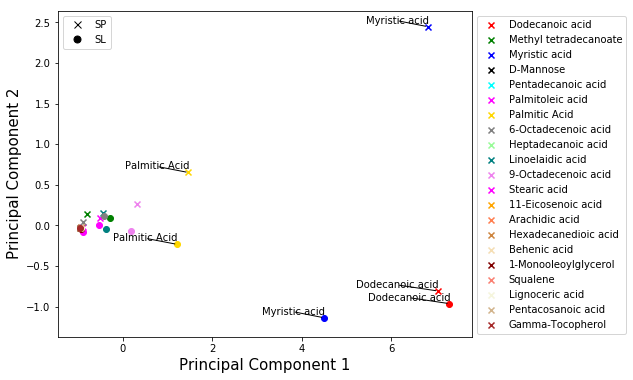

In [34]:

colors = itertools.cycle(['red', 'green', 'blue', 'black', 'cyan', 'magenta', 'gold', 'grey', 'palegreen',
         'teal', 'violet', 'fuchsia', 'orange', 'coral', 'peru', 'wheat', 'maroon', 
          'salmon', 'beige', 'tan', 'brown'])

x = principalDf['principal component 1'].values
#print(len(x))
y = principalDf['principal component 2'].values
#print(len(y))

def mark(i):
    #print(principalDf.loc[i,'species'])
    if principalDf.loc[i,'species'] == 'SP':
        return "x"
    else:
        return 'o'

def lab(i):
    if i < 21:
        return principalDf.loc[i,'constituent']
    
def lab1(i):
    if i == 1:
        return "SP"
    if i == 23:
        return "SL"
    
for i in range(0,len(x)):
    plt.scatter(x[i], y[i], label = lab(i), color=next(colors), marker = mark(i))
    if x[i] > 1:
        plt.annotate(
        principalDf.loc[i,'constituent'],
        xy=(x[i], y[i]), xytext=(1,1),
        textcoords='offset points', ha='right', va='bottom',
        arrowprops=dict(arrowstyle = '-', connectionstyle='arc3,rad=0'))
    
plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
#plt.title('PCA GCMS', fontsize = 20)

#for legend
black_x = mlines.Line2D([],[], color = 'black', marker = 'x', linestyle = 'None', markersize = 7, label = 'SP')
black_o = mlines.Line2D([],[], color = 'black', marker = 'o', linestyle = 'None', markersize = 7, label = 'SL')
l = plt.legend(handles=[black_x, black_o])
plt.legend(bbox_to_anchor=(1.0, 1.0))
#for text in l.get_legend():
   # text.set_color("red")
#plt.legend()
#ax.grid()
plt.gca().add_artist(l)

fig = matplotlib.pyplot.gcf()
plt.gcf().subplots_adjust(right=0.7)
fig.set_size_inches(10, 6)
fig.savefig('pca_gc.png', dpi=100)

plt.show

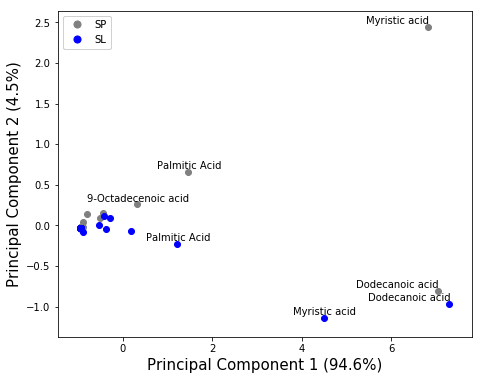

In [96]:
#second version of plot
x = principalDf['principal component 1'].values
#print(len(x))
y = principalDf['principal component 2'].values
#print(len(y))

plt.xlabel('Principal Component 1 ({percent}%)'.format(percent = round(pca.explained_variance_ratio_[0]*100, 1)), fontsize = 15)
plt.ylabel('Principal Component 2 ({percent}%)'.format(percent = round(pca.explained_variance_ratio_[1]*100, 1)), fontsize = 15)

def colors(i):
    if i > 20:
        return "blue"
    else:
        return "grey"

for i in range(0,len(x)):
    plt.scatter(x[i], y[i], label = lab(i), color=colors(i), marker = "o")
    if x[i] > 6:
        plt.annotate(
        principalDf.loc[i,'constituent'],
        xy=(x[i], y[i]), xytext=(1,1),
        textcoords='offset points', ha='right', va='bottom')
    elif x[i] > 0.25 or y[i] < -.3 :
        plt.annotate(
        principalDf.loc[i,'constituent'],
        xy=(x[i], y[i]), xytext=(1,1),
        textcoords='offset points', ha='center', va='bottom')

#for legend
black_x = mlines.Line2D([],[], color = 'grey', marker = 'o', linestyle = 'None', markersize = 7, label = 'SP')
black_o = mlines.Line2D([],[], color = 'blue', marker = 'o', linestyle = 'None', markersize = 7, label = 'SL')
l = plt.legend(handles=[black_x, black_o])
plt.gca().add_artist(l)
        
fig = matplotlib.pyplot.gcf()
plt.gcf().subplots_adjust(right=0.7)
fig.set_size_inches(10, 6)
fig.savefig('pca_gc_2col.png', dpi=100)

In [94]:
principalDf

,principal component 1,principal component 2,principal component 3,constituent,species
0,7.041586,-0.807215,0.941512,Dodecanoic acid,SP
1,-0.812833,0.140311,0.074680,Methyl tetradecanoate,SP
2,6.811994,2.448791,-0.116769,Myristic acid,SP
3,-0.958811,-0.028990,-0.004011,D-Mannose,SP
4,-0.936220,-0.023819,-0.005181,Pentadecanoic acid,SP
5,-0.901504,-0.015712,-0.012184,Palmitoleic acid,SP
6,1.455401,0.653000,-0.064149,Palmitic Acid,SP
7,-0.891674,0.045311,0.031010,6-Octadecenoic acid,SP
8,-0.934845,-0.020684,-0.003804,Heptadecanoic acid,SP
9,-0.442792,0.157365,-0.002189,Linoelaidic acid,SP


In [35]:
colors = ['red', 'green', 'blue', 'black', 'cyan', 'magenta', 'yellow', 'grey', 'palegreen',
         'lightblue', 'violet', 'fuchia', 'orange', 'coral', 'peru', 'wheat', 'maroon', 
          'teal', 'salmon', 'beige', 'tan', 'brown']

In [36]:
len(colors)

22

In [37]:
## For LC data

In [38]:
#import the data with pandas
lc_raw = pd.read_csv("lc_PCA_format.csv", sep=',', header=0, index_col=0)
lc_raw.head(n=4)

,sample 1,sample 2,sample 3,sample 4,sample 5,species
geraniol,117.495023,121.028351,161.434235,134.461174,117.063900,SP
1-Monolaurin,138.151108,111.359649,78.628872,192.849424,17.406258,SP
arabinose,107.307736,122.507823,152.778575,170.827696,95.574698,SP
Ascorbic acid,95.570859,150.293633,196.716439,182.237788,145.598188,SP


In [39]:
samples = ["sample 1", "sample 2", "sample 3", "sample 4", "sample 5"]

lc_scaled = StandardScaler().fit_transform(lc_raw.loc[:,samples].values)

lc_scaled[:2]

array([[-0.21395278, -0.22633957, -0.19435776, -0.21174289, -0.20120848],
       [-0.20675724, -0.22957594, -0.22201236, -0.2034476 , -0.23013282]])

In [40]:
#from sklearn.decomposition import PCA

lc_pca = PCA(n_components=3)

lc_principalComponents = lc_pca.fit_transform(lc_scaled)

lc_principalDf = pd.DataFrame(data = lc_principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

lc_principalDf.head(n=2)

,principal component 1,principal component 2,principal component 3
0,-0.468489,-0.007653,0.015552
1,-0.488360,-0.011403,-0.008449


In [41]:
lc_principalDf['constituent'] = lc_raw.index.values
lc_principalDf.set_index('constituent')
lc_principalDf["species"] = lc_raw['species'].values
lc_principalDf.head(n=5)

,principal component 1,principal component 2,principal component 3,constituent,species
0,-0.468489,-0.007653,0.015552,geraniol,SP
1,-0.488360,-0.011403,-0.008449,1-Monolaurin,SP
2,-0.471643,-0.012908,0.013666,arabinose,SP
3,-0.455516,-0.012482,0.024256,Ascorbic acid,SP
4,-0.180904,0.109315,0.055148,Caproic acid,SP


In [42]:
lc_pca.explained_variance_ratio_

array([ 0.99283582,  0.00448127,  0.00139735])

In [43]:
lc_principalDf

,principal component 1,principal component 2,principal component 3,constituent,species
0,-0.468489,-0.007653,0.015552,geraniol,SP
1,-0.488360,-0.011403,-0.008449,1-Monolaurin,SP
2,-0.471643,-0.012908,0.013666,arabinose,SP
3,-0.455516,-0.012482,0.024256,Ascorbic acid,SP
4,-0.180904,0.109315,0.055148,Caproic acid,SP
5,0.205061,0.102370,-0.014369,Caprylic acid,SP
6,-0.532889,-0.020011,0.001181,Ferulic acid,SP
7,15.943849,0.060774,-0.035896,Isoquercitrin,SP
8,2.667147,-0.302482,0.482698,Kaempferol,SP
9,0.197585,-0.365704,-0.069918,Myristic Acid,SP


<function matplotlib.pyplot.show>

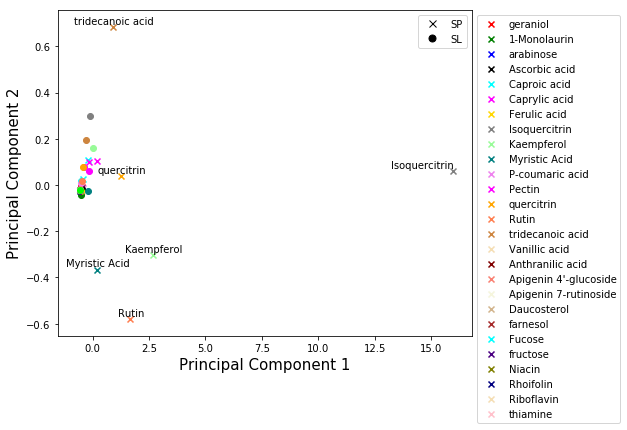

In [44]:
colors = itertools.cycle(['red', 'green', 'blue', 'black', 'cyan', 'magenta', 'gold', 'grey', 'palegreen',
         'teal', 'violet', 'fuchsia', 'orange', 'coral', 'peru', 'wheat', 'maroon', 
          'salmon', 'beige', 'tan', 'brown', 'aqua', 'indigo', 'olive', 'navy', 'wheat', 'pink', 'lime'])

x = lc_principalDf['principal component 1'].values
#print(len(x))
y = lc_principalDf['principal component 2'].values
#print(len(y))

def mark(i):
    #print(principalDf.loc[i,'species'])
    if lc_principalDf.loc[i,'species'] == 'SP':
        return "x"
    else:
        return 'o'

def lab(i):
    if i < 27:
        return lc_principalDf.loc[i,'constituent']
    
def lab1(i):
    if i == 1:
        return "SP"
    if i == 23:
        return "SL"
    
for i in range(0,len(x)):
    plt.scatter(x[i], y[i], label = lab(i), color=next(colors), marker = mark(i))
    if x[i] > 15:
        plt.annotate(
        lc_principalDf.loc[i,'constituent'],
        xy=(x[i], y[i]), xytext=(1,1),
        textcoords='offset points', ha='right', va='bottom')
    elif x[i] > 0.25 or y[i] < -.3 :
        plt.annotate(
        lc_principalDf.loc[i,'constituent'],
        xy=(x[i], y[i]), xytext=(1,1),
        textcoords='offset points', ha='center', va='bottom')
    
plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
#plt.title('PCA GCMS', fontsize = 20)

#for legend
black_x = mlines.Line2D([],[], color = 'black', marker = 'x', linestyle = 'None', markersize = 7, label = 'SP')
black_o = mlines.Line2D([],[], color = 'black', marker = 'o', linestyle = 'None', markersize = 7, label = 'SL')
l = plt.legend(handles=[black_x, black_o])
plt.legend(bbox_to_anchor=(1.0, 1.0))
#for text in l.get_legend():
   # text.set_color("red")
#plt.legend()
#ax.grid()
plt.gca().add_artist(l)

fig = matplotlib.pyplot.gcf()
plt.gcf().subplots_adjust(right=0.7)
fig.set_size_inches(10, 6)
fig.savefig('pca_lc.png', dpi=100)

plt.show

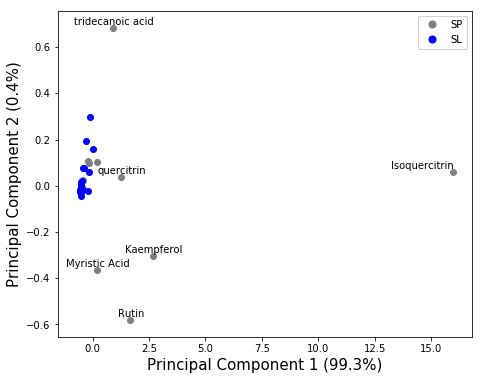

In [92]:
#second version of plot
x = lc_principalDf['principal component 1'].values
#print(len(x))
y = lc_principalDf['principal component 2'].values
#print(len(y))

plt.xlabel('Principal Component 1 ({percent}%)'.format(percent = round(lc_pca.explained_variance_ratio_[0]*100, 1)), fontsize = 15)
plt.ylabel('Principal Component 2 ({percent}%)'.format(percent = round(lc_pca.explained_variance_ratio_[1]*100, 1)), fontsize = 15)

def colors(i):
    if i > 27:
        return "blue"
    else:
        return "grey"

for i in range(0,len(x)):
    plt.scatter(x[i], y[i], label = lab(i), color=colors(i), marker = "o")
    if x[i] > 15:
        plt.annotate(
        lc_principalDf.loc[i,'constituent'],
        xy=(x[i], y[i]), xytext=(1,1),
        textcoords='offset points', ha='right', va='bottom')
    elif x[i] > 0.25 or y[i] < -.3 :
        plt.annotate(
        lc_principalDf.loc[i,'constituent'],
        xy=(x[i], y[i]), xytext=(1,1),
        textcoords='offset points', ha='center', va='bottom')

#for legend
black_x = mlines.Line2D([],[], color = 'grey', marker = 'o', linestyle = 'None', markersize = 7, label = 'SP')
black_o = mlines.Line2D([],[], color = 'blue', marker = 'o', linestyle = 'None', markersize = 7, label = 'SL')
l = plt.legend(handles=[black_x, black_o])
plt.gca().add_artist(l)
        
fig = matplotlib.pyplot.gcf()
plt.gcf().subplots_adjust(right=0.7)
fig.set_size_inches(10, 6)
fig.savefig('pca_lc_2col.png', dpi=100)

In [90]:
lc_principalDf

,principal component 1,principal component 2,principal component 3,constituent,species
0,-0.468489,-0.007653,0.015552,geraniol,SP
1,-0.488360,-0.011403,-0.008449,1-Monolaurin,SP
2,-0.471643,-0.012908,0.013666,arabinose,SP
3,-0.455516,-0.012482,0.024256,Ascorbic acid,SP
4,-0.180904,0.109315,0.055148,Caproic acid,SP
5,0.205061,0.102370,-0.014369,Caprylic acid,SP
6,-0.532889,-0.020011,0.001181,Ferulic acid,SP
7,15.943849,0.060774,-0.035896,Isoquercitrin,SP
8,2.667147,-0.302482,0.482698,Kaempferol,SP
9,0.197585,-0.365704,-0.069918,Myristic Acid,SP


In [45]:
###for maldi

In [46]:
#import the data with pandas
maldi_raw = pd.read_csv("maldi_PCA_format.csv", sep=',', header=0, index_col=0)
maldi_raw.head(n=4)

,sample 1,sample 2,sample 3,sample 4,sample 5,species
constituent,,,,,,
geraniol,0.00,44.43,3.51,30.36,0.00,SP
Fucose,0.00,4.10,1.43,4.73,1.68,SP
Decanoic acid,0.00,6.40,0.67,2.66,0.00,SP
Fructose,0.17,7.14,1.48,4.24,1.39,SP


In [47]:
#from sklearn.preprocessing import StandardScaler

samples = ["sample 1", "sample 2", "sample 3", "sample 4", "sample 5"]

data =  maldi_raw.loc[:,samples].values

maldi_scaled = StandardScaler().fit_transform(data)

maldi_scaled[:2]

array([[ -2.64835075e-01,   4.74228011e+00,   1.79179388e-01,
          4.48391391e+00,  -4.12999266e-01],
       [ -2.64835075e-01,   2.10870944e-03,  -2.06972259e-01,
          2.26821510e-01,  -9.62629868e-02]])

In [48]:
#from sklearn.decomposition import PCA

maldi_pca = PCA(n_components=3)

maldi_principamaldiomponents = maldi_pca.fit_transform(maldi_scaled)

maldi_principalDf = pd.DataFrame(data = maldi_principamaldiomponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

maldi_principalDf.head(n=2)

,principal component 1,principal component 2,principal component 3
0,3.508047,5.310926,0.958048
1,-0.157302,0.241976,0.178566


In [49]:
maldi_principalDf['constituent'] = maldi_raw.index.values
maldi_principalDf.set_index('constituent')
maldi_principalDf["species"] = maldi_raw['species'].values
maldi_principalDf.head(n=5)

,principal component 1,principal component 2,principal component 3,constituent,species
0,3.508047,5.310926,0.958048,geraniol,SP
1,-0.157302,0.241976,0.178566,Fucose,SP
2,-0.442718,0.488109,-0.094487,Decanoic acid,SP
3,-0.084846,0.510959,0.039464,Fructose,SP
4,0.605243,-0.408201,1.122490,Mannitol,SP


<function matplotlib.pyplot.show>

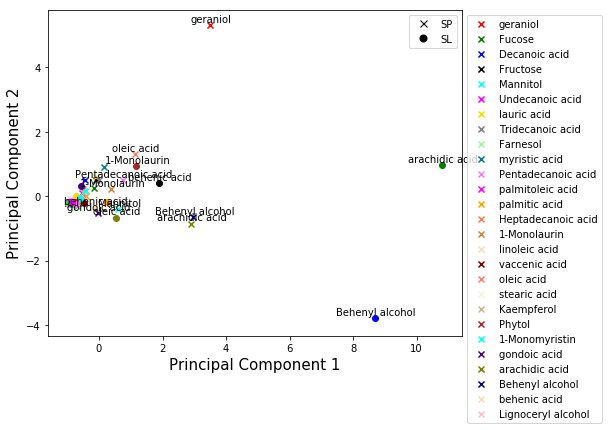

In [65]:
colors = itertools.cycle(['red', 'green', 'blue', 'black', 'cyan', 'magenta', 'gold', 'grey', 'palegreen',
         'teal', 'violet', 'fuchsia', 'orange', 'coral', 'peru', 'wheat', 'maroon', 
          'salmon', 'beige', 'tan', 'brown', 'aqua', 'indigo', 'olive', 'navy', 'wheat', 'pink', 'lime'])

x = maldi_principalDf['principal component 1'].values
#print(len(x))
y = maldi_principalDf['principal component 2'].values
#print(len(y))

def mark(i):
    #print(principalDf.loc[i,'species'])
    if maldi_principalDf.loc[i,'species'] == 'SP':
        return "x"
    else:
        return 'o'

def lab(i):
    if i < 27:
        return maldi_principalDf.loc[i,'constituent']
    
def lab1(i):
    if i == 1:
        return "SP"
    if i == 23:
        return "SL"
    
for i in range(0,len(x)):
    plt.scatter(x[i], y[i], label = lab(i), color=next(colors), marker = mark(i))
    if x[i] > 15:
        plt.annotate(
        maldi_principalDf.loc[i,'constituent'],
        xy=(x[i], y[i]), xytext=(1,1),
        textcoords='offset points', ha='right', va='bottom')
    elif x[i] > 0.25 or y[i] < -.3 :
        plt.annotate(
        maldi_principalDf.loc[i,'constituent'],
        xy=(x[i], y[i]), xytext=(1,1),
        textcoords='offset points', ha='center', va='bottom')
    
plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
#plt.title('PCA GCMS', fontsize = 20)

#for legend
black_x = mlines.Line2D([],[], color = 'black', marker = 'x', linestyle = 'None', markersize = 7, label = 'SP')
black_o = mlines.Line2D([],[], color = 'black', marker = 'o', linestyle = 'None', markersize = 7, label = 'SL')
l = plt.legend(handles=[black_x, black_o])
plt.legend(bbox_to_anchor=(1.0, 1.0))
#for text in l.get_legend():
   # text.set_color("red")
#plt.legend()
#ax.grid()
plt.gca().add_artist(l)

fig = matplotlib.pyplot.gcf()
plt.gcf().subplots_adjust(right=0.7)
fig.set_size_inches(10, 6)
fig.savefig('pca_maldi_2col.png', dpi=100)

plt.show

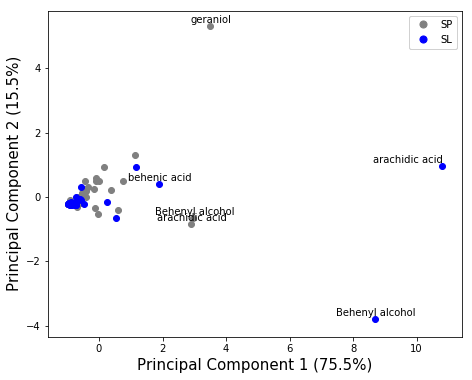

In [87]:
#second version of plot
x = maldi_principalDf['principal component 1'].values
#print(len(x))
y = maldi_principalDf['principal component 2'].values
#print(len(y))

plt.xlabel('Principal Component 1 ({percent}%)'.format(percent = round(maldi_pca.explained_variance_ratio_[0]*100, 1)), fontsize = 15)
plt.ylabel('Principal Component 2 ({percent}%)'.format(percent = round(maldi_pca.explained_variance_ratio_[1]*100, 1)), fontsize = 15)

def colors(i):
    if i > 33:
        return "blue"
    else:
        return "grey"

for i in range(0,len(x)):
    plt.scatter(x[i], y[i], label = lab(i), color=colors(i), marker = "o")
    if x[i] > 10:
        plt.annotate(
        maldi_principalDf.loc[i,'constituent'],
        xy=(x[i], y[i]), xytext=(1,1),
        textcoords='offset points', ha='right', va='bottom')
    elif x[i] > 1.8:
        plt.annotate(
        maldi_principalDf.loc[i,'constituent'],
        xy=(x[i], y[i]), xytext=(1,1),
        textcoords='offset points', ha='center', va='bottom')

#for legend
black_x = mlines.Line2D([],[], color = 'grey', marker = 'o', linestyle = 'None', markersize = 7, label = 'SP')
black_o = mlines.Line2D([],[], color = 'blue', marker = 'o', linestyle = 'None', markersize = 7, label = 'SL')
l = plt.legend(handles=[black_x, black_o])
plt.gca().add_artist(l)
        
fig = matplotlib.pyplot.gcf()
plt.gcf().subplots_adjust(right=0.7)
fig.set_size_inches(10, 6)
fig.savefig('pca_maldi_2col.png', dpi=100)

In [74]:
maldi_pca.explained_variance_ratio_

array([ 0.7546774 ,  0.15481617,  0.06273141])

In [53]:
import re

protein = "ASDFLKJSARCEMAWEFEFALKMKLKEFAWKKKKKKKASDFASDFSDFSD:FJDSFLJLK:SDFJ:JSDJFK:JKLSDF\
SDFLSKJDFLKJSDFLKJ\
SDFLKsJLWKKKKKKKASKSJDFLKJSFDLJKLKJDFLKJSDFLKJSDF"

motif = r'[.]*W[K]+A[S|F][.]*'

ans = re.search(motif, protein, re.I|re.M)

print(ans)

<_sre.SRE_Match object; span=(29, 39), match='WKKKKKKKAS'>


In [54]:
print("hi")

hi


In [85]:
maldi_principalDf

,principal component 1,principal component 2,principal component 3,constituent,species
0,3.508047,5.310926,0.958048,geraniol,SP
1,-0.157302,0.241976,0.178566,Fucose,SP
2,-0.442718,0.488109,-0.094487,Decanoic acid,SP
3,-0.084846,0.510959,0.039464,Fructose,SP
4,0.605243,-0.408201,1.122490,Mannitol,SP
5,-0.444672,0.189857,0.001296,Undecanoic acid,SP
6,-0.078718,0.600377,-0.095678,lauric acid,SP
7,0.013006,0.492959,0.095151,Tridecanoic acid,SP
8,-0.423682,0.172530,-0.076646,Farnesol,SP
9,0.160519,0.916087,-0.162746,myristic acid,SP


In [97]:
import sys
print(sys.version)

3.5.4 |Anaconda custom (x86_64)| (default, Aug 14 2017, 12:43:10) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
